In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [11]:
def clean_homeaway_row(row):
    row_price_clean = re.sub(r'[\$,]', '', row.price)
    row.price = int(row_price_clean)
    row.rating = np.nan if np.isnan(row.rating) else float(row.rating)
    row.number_reviews = 0 if np.isnan(row.number_reviews) else int(row.number_reviews)
    row.bathrooms = int(row.bathrooms)
    row.bedrooms = 0 if (row.bedrooms == 'Studio') else int(row.bedrooms)
    row.geo_lat = float(row.geo_lat)
    row.geo_long = float(row.geo_long)
    
    if isinstance(row.min_stay, str):
        nights = row.min_stay.replace('nights', '').strip()
        nights = [int(n) for n in nights.split('-')]
        min_stay = np.floor(np.average(nights))
    elif(row.min_stay):
        min_stay = 1
    row.min_stay = min_stay
    return row
    
def clean_homeaway_data(df):
    # drop rows with same url
    df = df.drop_duplicates(subset=['url'])
    df = df[df.price.notnull()]
    df = df.apply(clean_homeaway_row, axis=1)
    df = df.drop_duplicates(subset=['title', 'price', 'sleeps'])
    return df
    
data_file = 'data/homeaway_rentals_nyc_ALL.txt'
headers = ['url', 'price', 'title', 'geo_lat', 'geo_long', 'rating',
           'number_reviews', 'sleeps', 'bedrooms', 'bathrooms',
           'min_stay']

df = pd.read_csv(data_file, sep='\t', header=None, names=headers)
df = clean_homeaway_data(df)
df.head()

,url,price,title,geo_lat,geo_long,rating,number_reviews,sleeps,bedrooms,bathrooms,min_stay
0,https://www.homeaway.com/vacation-rental/p353201,100,Modern Studio Haven in Quiet Cul-de-sac... - HomeAway Bedford-Stuyvesant,40.680474,-73.935103,4.6,38,3,0,1,4.0
1,https://www.homeaway.com/vacation-rental/p240675,271,Charming 3 Bedroom/2Bath Duplex Apartment... - HomeAway Bedford-Stuyvesant,40.680691,-73.935513,4.7,59,9,3,2,4.0
2,https://www.homeaway.com/vacation-rental/p3926833,904,"5 Bedroom 3 Bathroom Residence - 2,500... - HomeAway Financial District",40.711948,-74.006740,4.9,50,12,5,3,4.0
3,https://www.homeaway.com/vacation-rental/p3478776,590,LUXURY TWO BED/TW0 BATH CHELSEA HIGH... - HomeAway Chelsea,40.745583,-73.991396,4.9,73,5,2,2,5.0
4,https://www.homeaway.com/vacation-rental/p4227371,142,Sydni's Patch Near Manhattan - HomeAway Bedford-Stuyvesant,40.684658,-73.955302,4.6,23,6,2,1,5.0


In [12]:
df.describe()

,price,geo_lat,geo_long,rating,number_reviews,sleeps,bedrooms,bathrooms,min_stay
count,4.000000e+03,4000.000000,4000.000000,1630.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000
mean,3.692813e+04,40.739385,-73.972730,4.563742,6.600500,5.078000,1.832500,1.30250,9.16750
std,2.313178e+06,0.050599,0.060157,0.611546,16.193192,2.826467,1.154676,0.75242,12.31399
min,0.000000e+00,40.461098,-74.357016,1.000000,0.000000,0.000000,0.000000,0.00000,1.00000
25%,1.610000e+02,40.714727,-73.994440,4.400000,0.000000,3.000000,1.000000,1.00000,2.00000
50%,2.500000e+02,40.743607,-73.979966,4.800000,0.000000,4.000000,2.000000,1.00000,3.00000
75%,4.000000e+02,40.766266,-73.951813,5.000000,4.000000,6.000000,2.000000,1.00000,7.00000
max,1.462985e+08,40.974511,-73.673384,5.000000,175.000000,38.000000,15.000000,23.00000,180.00000


In [13]:
# Find number of outliers
print('# Rentals with nightly price >= $3000:', (df.loc[df.price >= 3000].shape[0]))
print('# Rentals with minimum # night stay >= 100:', (df.loc[df.min_stay >= 100].shape[0]))
print('# Rentals with # bedrooms >= 10:', (df.loc[df.bedrooms >= 10].shape[0]))

# Rentals with nightly price >= $3000: 13
# Rentals with minimum # night stay >= 100: 2
# Rentals with # bedrooms >= 10: 2


In [14]:
# Remove these outliers
df = df[df.price < 3000]
df = df[df.bedrooms < 10]
df = df[df.min_stay < 100]

# Final stats after all cleaning and feature engineering:
df.describe()

,price,geo_lat,geo_long,rating,number_reviews,sleeps,bedrooms,bathrooms,min_stay
count,3983.000000,3983.000000,3983.000000,1628.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,339.644991,40.739395,-73.972663,4.563943,6.616621,5.057494,1.823249,1.296008,9.081346
std,305.013191,0.050570,0.060240,0.611734,16.217721,2.745794,1.124537,0.737529,11.855628
min,0.000000,40.461098,-74.357016,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,161.000000,40.714782,-73.994389,4.400000,0.000000,3.000000,1.000000,1.000000,2.000000
50%,250.000000,40.743607,-73.979947,4.800000,0.000000,4.000000,2.000000,1.000000,3.000000
75%,400.000000,40.766315,-73.951797,5.000000,4.000000,6.000000,2.000000,1.000000,7.000000
max,2875.000000,40.974511,-73.673384,5.000000,175.000000,32.000000,9.000000,23.000000,90.000000


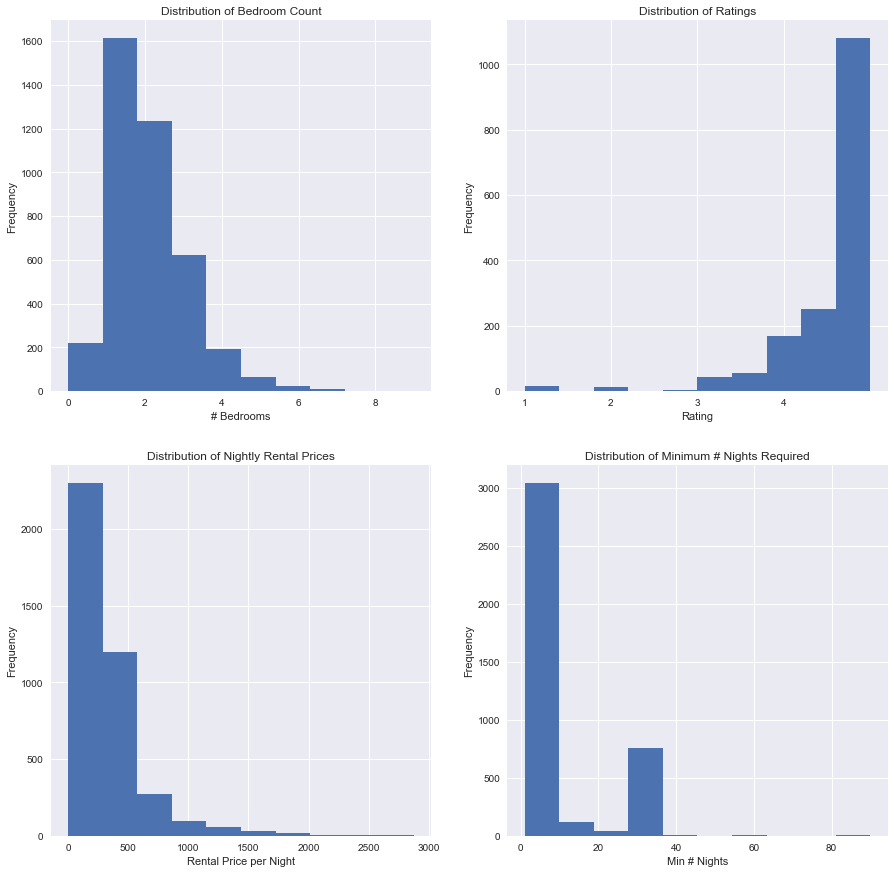

In [15]:
# Not all rentals have reviews
df_with_reviews = df[df.rating.notnull()]

# Plot some basic graphs to understand the data
fig_overview, ax_overview = plt.subplots(2, 2, figsize=(15, 15))

ax_overview[0][0].hist(df.bedrooms.as_matrix())
ax_overview[0][0].set_title('Distribution of Bedroom Count')
ax_overview[0][0].set_xlabel('# Bedrooms')
ax_overview[0][0].set_ylabel('Frequency')

ax_overview[0][1].hist(df_with_reviews.rating.as_matrix())
ax_overview[0][1].set_title('Distribution of Ratings')
ax_overview[0][1].set_xlabel('Rating')
ax_overview[0][1].set_ylabel('Frequency')
ax_overview[0][1].xaxis.set_ticks(np.arange(1,5,1))

ax_overview[1][0].hist(df.price.as_matrix())
ax_overview[1][0].set_title('Distribution of Nightly Rental Prices')
ax_overview[1][0].set_xlabel('Rental Price per Night')
ax_overview[1][0].set_ylabel('Frequency')

ax_overview[1][1].hist(df.min_stay.as_matrix())
ax_overview[1][1].set_title('Distribution of Minimum # Nights Required')
ax_overview[1][1].set_xlabel('Min # Nights')
ax_overview[1][1].set_ylabel('Frequency')

array([  4.,   5.,   2.,   1.,   3.,  90.,   7.,  21.,  30.,   6.,  18.,
        14.,  22.,   8.,  29.,   9.,  13.,  10.,  48.,  60.,  17.,  28.,
        15.,  19.,  20.,  31.,  11.,  47.,  16.,  25.,  45.,  12.,  33.,
        27.])

In [ ]:
# 30 - 61 nights = 30 nights
# 3 - 30 nights = 30 nights
# 5 - 8 nights = 5 nights
# 30 - 180 nights = 180 nights, all booked!
# 7 - 14 nights = 14 nights
# 5 - 90 = 5 nights
# 1 - 15 nights = 1?
# 6 - 30 nights = both
# 4 - 21 nights = 4
print(df.loc[df.min_stay == '4 - 18 nights'].url)


In [ ]:
df.loc[df.min_stay.isnull()]

In [ ]:
np.floor(2.5)